In [ ]:
import os
os.chdir('drive/MyDrive/DL202010770/Lab02')

%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Layer, AveragePooling2D, Input, BatchNormalization, ReLU, Add, GlobalAveragePooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

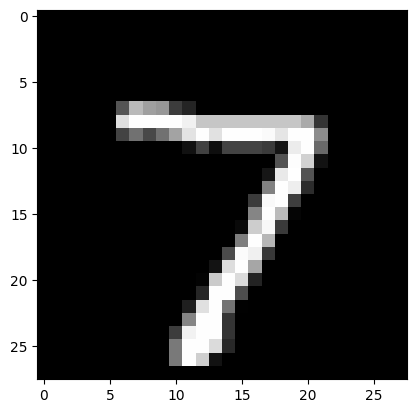

In [ ]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
model = Sequential([
    # C1: Convolutional Layer
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1), padding='same'),
    # S2: Subsampling Layer (Average Pooling)
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),

    # C3: Convolutional Layer
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'),
    # S4: Subsampling Layer (Average Pooling)
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),

    # C5: Convolutional Layer
    Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'),
    Flatten(),


    # F6: Fully Connected Layer
    Dense(84, activation='relu'),

    # Output Layer
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split = 0.1)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.3f}')

Epoch 1/10
422/422 [==============================] - 5s 7ms/step - loss: 0.4171 - accuracy: 0.8771 - val_loss: 0.1453 - val_accuracy: 0.9550
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1217 - accuracy: 0.9638 - val_loss: 0.0766 - val_accuracy: 0.9795
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0806 - accuracy: 0.9758 - val_loss: 0.0644 - val_accuracy: 0.9823
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0659 - accuracy: 0.9800 - val_loss: 0.0556 - val_accuracy: 0.9853
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0517 - accuracy: 0.9841 - val_loss: 0.0601 - val_accuracy: 0.9840
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0440 - accuracy: 0.9859 - val_loss: 0.0574 - val_accuracy: 0.9858
Epoch 7/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.0463 - val_accuracy: 0.9882
Epoch 

In [ ]:
y_pred=model.predict(x_test)
y_pred=np.array(y_pred)

313/313 [==============================] - 1s 2ms/step


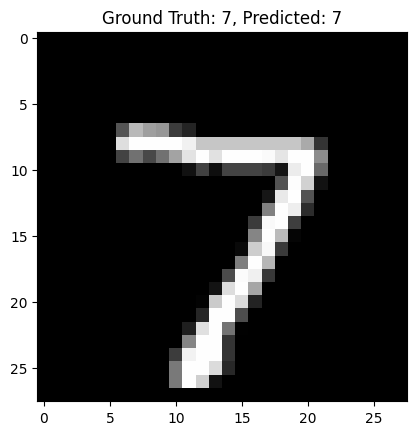

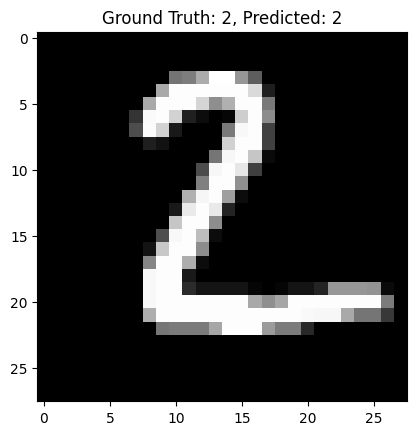

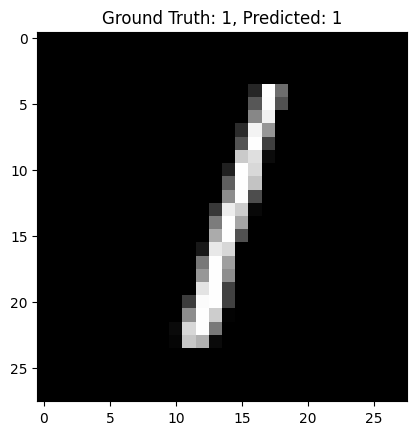

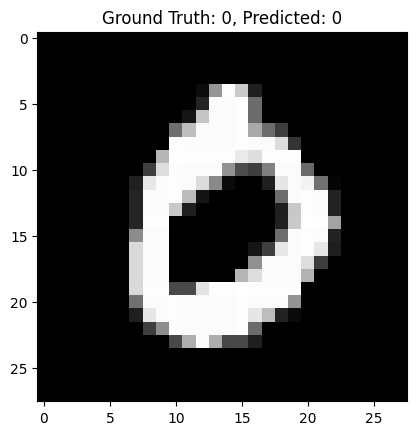

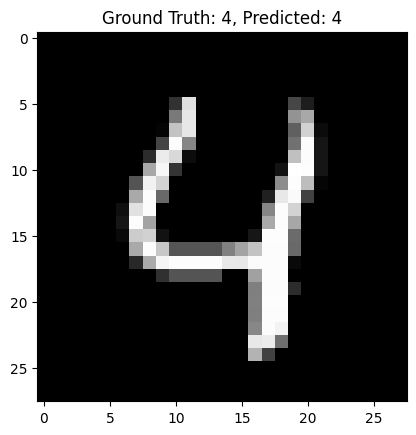

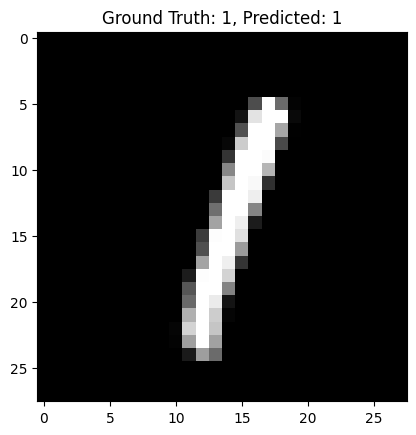

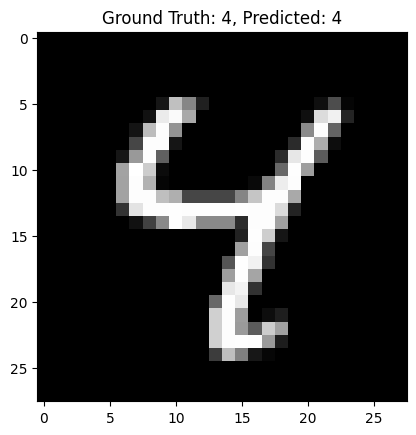

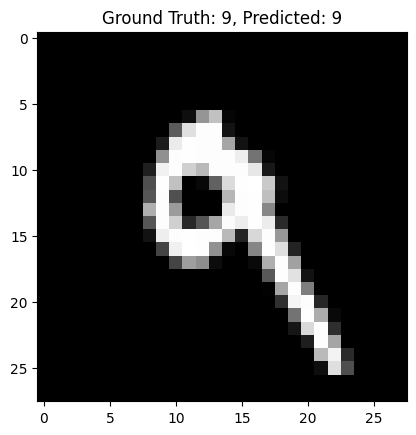

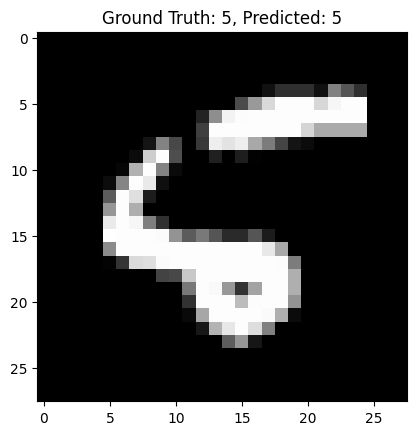

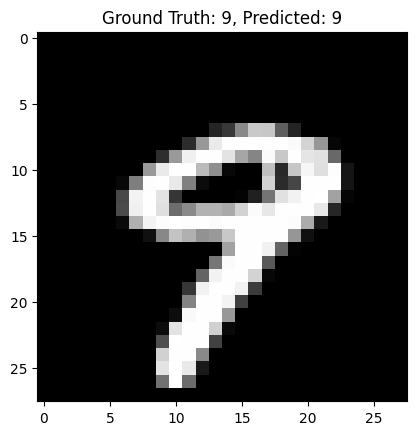

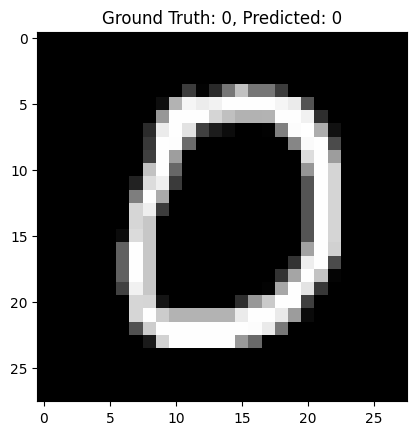

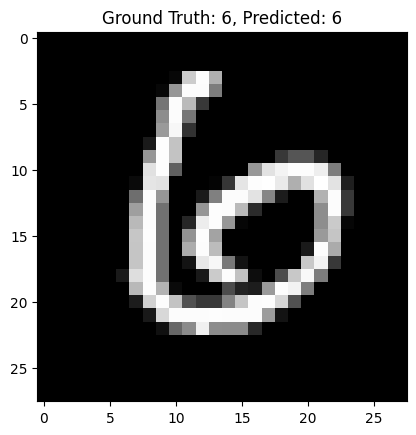

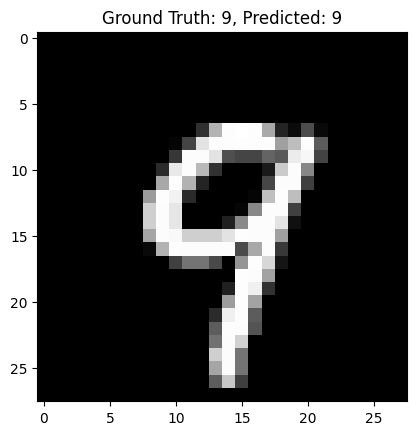

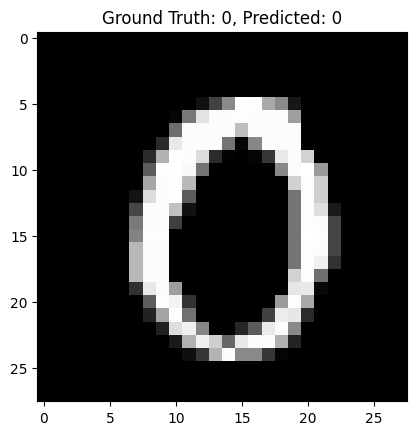

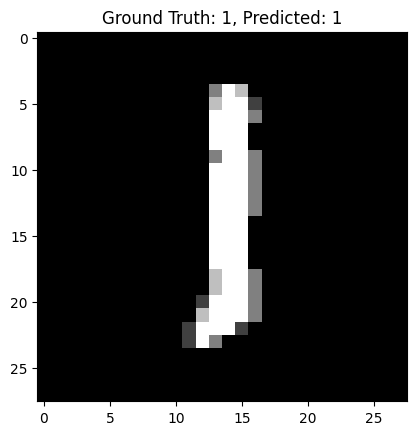

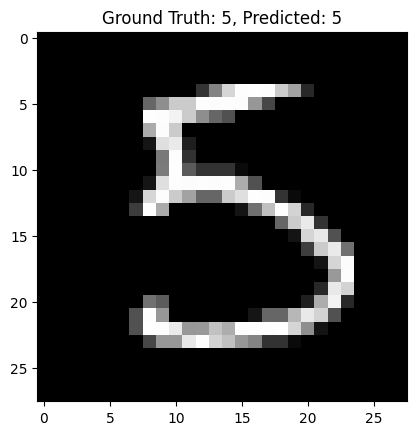

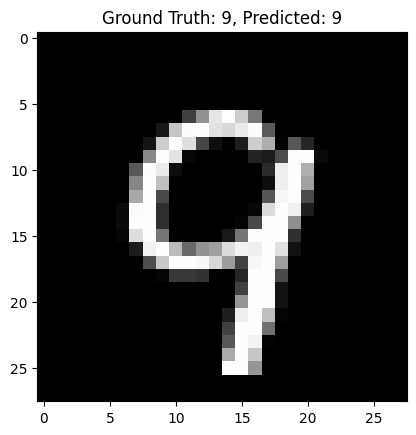

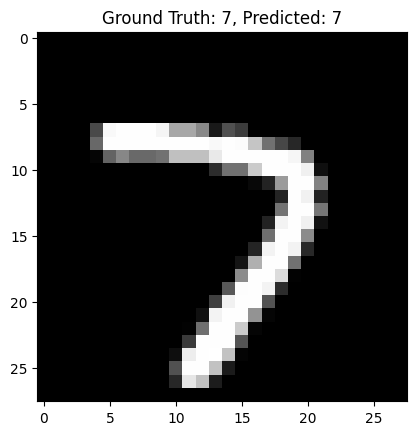

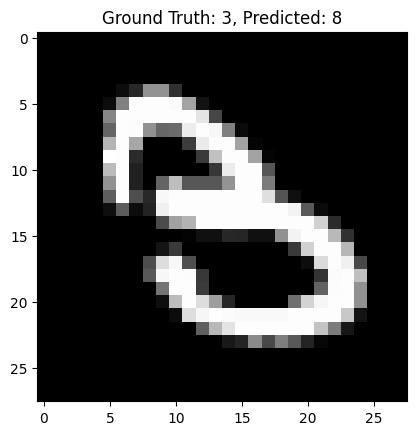

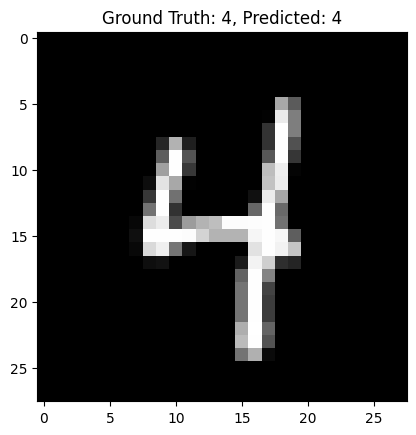

In [ ]:
for idx in range(20):
    plt.title("Ground Truth: {}, Predicted: {}".format(str(np.argmax(y_test[idx])), str(np.argmax(y_pred[idx]))))
    plt.imshow(x_test[idx], cmap='gray')
    plt.show()

In [ ]:
class MyConv2D(Layer):
    def __init__(self, filters, kernel_size, strides=(1, 1), padding='SAME', activation=None, **kwargs):
        super(MyConv2D, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.padding = padding
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(self.kernel_size[0], self.kernel_size[1], input_shape[-1], self.filters),
            initializer='glorot_uniform',
            trainable=True,
            name='kernel'
        )
        self.b = self.add_weight(
            shape=(self.filters,),
            initializer='zeros',
            trainable=True,
            name='bias'
        )
        super(MyConv2D, self).build(input_shape)  # 필수

    def call(self, inputs):
        # 컨볼루션 연산 수행
        x = tf.nn.conv2d(inputs, self.w, strides=[1, *self.strides, 1], padding=self.padding)

        # 편향 추가
        x = tf.nn.bias_add(x, self.b)

        # 활성화 함수 적용
        if self.activation is not None:
            x = self.activation(x)
        return x

    def get_config(self):
        config = super(MyConv2D, self).get_config()
        config.update({
            'filters': self.filters,
            'kernel_size': self.kernel_size,
            'strides': self.strides,
            'padding': self.padding,
            'activation': tf.keras.activations.serialize(self.activation)
        })
        return config

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split = 0.1)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.3f}')

Epoch 1/10
422/422 [==============================] - 4s 5ms/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0460 - val_accuracy: 0.9885
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0209 - accuracy: 0.9930 - val_loss: 0.0402 - val_accuracy: 0.9898
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0416 - val_accuracy: 0.9902
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0170 - accuracy: 0.9941 - val_loss: 0.0431 - val_accuracy: 0.9872
Epoch 5/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0413 - val_accuracy: 0.9895
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0432 - val_accuracy: 0.9902
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0437 - val_accuracy: 0.9897
Epoch 

In [ ]:
def residual_block(x, filters, stride=1):
    shortcut = x

    # 첫 번째 컨볼루션
    x = Conv2D(filters, 3, padding='same', strides=stride)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # 두 번째 컨볼루션
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)

    # shortcut 연결
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

In [ ]:
def build_resnet34(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # 초기 컨볼루션 레이어
    x = Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)

    # Residual 블록
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)
    x = residual_block(x, 512)

    # 평균 풀링 및 밀집층
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    # 모델 구성
    model = Model(inputs=inputs, outputs=x)
    return model

In [ ]:
resnet34_model = build_resnet34((244,244,3), 10)
resnet34_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 244, 244, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 122, 122, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 122, 122, 64)         256       ['conv2d_6[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 122, 122, 64)         0         ['batch_normalization[0][0

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_trian = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

moel = build_resnet34((32,32,3), 10)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split = 0.1)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.3f}')

170498071/170498071 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                     

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 32, 32, 3)


In [ ]:
cifar10 = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
for idx in range(len(y_pred[:10])):
    plt.title("Ground Truth: {}, Predicted: {}".format(cifar10[np.argmax(y_test[idx])], cifar10[np.argmax(y_pred[idx])]))
    plt.imshow(x_test[idx], cmap='gray')
    plt.show()